In [3]:
import time
import sys
import math

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
bleu_scores = {
    'exp002-1.1': [
        13.05, # 1
        15.54,
        16.82,
        17.12,
        16.73,
        17.13,
        17.87,
        17.86,
        17.56,
        18.03,
        18.06,
        18.07,
        18.05,
        18.30,
        18.10,
        18.08,
        18.24,
        17.96,
        17.88,
        18.07, # 20
    ],
    'exp002-1.2': [
       3.04, # 1
       4.05,
       4.63,
       5.28,
       5.55,
       5.48, # 6
    ],
    'exp002-2.1': [
       13.64,
        15.21,
        16.01,
        16.66,
        17.58,
        17.51,
        17.69,
        17.87,
        17.87,
        18.01,
        18.05,
        18.27,
        18.09,
        18.08,
        18.21,
        18.18,
        18.32,
        18.20,
        17.97,
        18.08,#20
    ],
    'exp002-3.1': [
        9.16, 
        11.46,
        12.27,
        12.68,
        12.83,
        12.90,
        12.99,
        13.51,
        13.28,
        13.77,
        13.92,
        13.69,
        14.18,
        13.58,
        13.80,
        14.01,
        13.64,
        14.07,
        14.16,
        14.11,
        13.94,
        13.92,
        13.64,
        13.97,
        13.84,
    ],
    'exp002-4.1a': [
         8.82, # 1
        11.63,
        12.19,
        12.93,
        13.09,
        13.47,
        13.40,
        13.51, 
        13.70,
        13.03,
        14.08,
        13.81,
        14.09,
        13.65, 
        13.75,
        14.22,
        13.86,
        14.10,
        14.16,
        13.94,
        13.89,
        13.66,
        13.90,
        13.96,
        13.93, # 25
    ],
    'exp002-4.1b': [
        9.36, 
        11.59,
        12.38,
        12.72,
        12.78,
        13.24,
        13.32,
        13.43,
        13.66,
        12.77,
        13.86,
        13.86,
        13.41,
        13.83,
        13.89,
        13.90,
        14.02,
        13.65,
        13.61,
        13.61,
        13.89,
        13.54,
        13.83,
        13.96,
        14.13,
    ],
    'exp003-1.1': [ 
        21.16, # 1
        24.64,
        24.50,
        26.17,
        26.71,
        27.14,
        27.39,
        27.53,
        27.61,
        27.74,
        27.82,
        27.73,
        27.94,
        28.06,
        28.14,
        28.15,
        27.94,
        27.63,
        27.84,
        27.83, # 20
    ],
    'exp004-1': [ 
        23.08,
        25.91,
        27.97,
        28.53,
        28.78,
        29.44,
        29.71,
        29.72,
        29.99,
        29.98,
        29.63,
        30.38,
        30.26,
        30.40,
        30.40,
        30.38,
        30.36,
        30.34,
        30.57,
        30.58,
        30.49,
        30.59,
        30.67,
        30.26,
        30.57,
      
    ],
    'exp004-1.1': [ 
      15.80,
        24.82,
        27.57,
        28.91,
        29.81,
        30.33,
        30.72,
        31.04,
        30.96,
        30.71,
        31.09,
        31.54,
        31.40,
        31.65,
        31.63,
        31.40,
        31.37,
        31.36,
        31.60,
        31.54,
        31.44,
        31.46,
        31.52,
        31.24,
        31.27,
    ],
}

In [5]:

def plot_bleu_score_over_n_epoch_compare(exp_names):

    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111)

    n_epochs = len(bleu_scores[exp_names[0]]) + 1
    
    str_exp_names = ','.join(exp_names)
    
    ax.set_title('BLEU score for epoch 1 to {} ({})'.format(n_epochs - 1, str_exp_names))
    ax.set_xlabel('Epoch')
    ax.set_ylabel('BLEU Score')

    ax.set_xticks(np.arange(1, n_epochs, 1))
    
    for exp_name in exp_names:
        y = bleu_scores[exp_name]
        ax.plot(y, label=exp_name)
        ax.set_yticks(np.arange(math.floor(min(y)), math.ceil(max(y)), 0.5))
        
        
    colors = sns.color_palette("husl", 8)
    for i,j in enumerate(ax.lines):
        j.set_color(colors[i])

    ax.legend(loc=2)

    print('')
    
    
def plot_bleu_score_over_n_epoch(exp_name):
    y = bleu_scores[exp_name]
    n_epochs = len(y) + 1

    sns.set(rc={'figure.figsize':(15,8)})

    ax = sns.lineplot(x=range(1, n_epochs, 1),
                      y=y,
                      palette="rocket")
    ax.set_title('BLEU score for epoch 1 to {} ({})'.format(n_epochs - 1, exp_name))
    ax.set_xlabel('Epoch')
    ax.set_ylabel('BLEU Score')
    ax.set_yticks(np.arange(math.floor(min(y)), math.ceil(max(y)), 0.5))

    ax.set_xticks(np.arange(1, n_epochs, 1))
    print('')

# EN -> TH

## Evaluation result -- exp002-1.1
### Transformer Base (en->th) (word->word)


In the experiment setup,

The vocaburary used is ins word-level (from `pythainlp.tokenize.newmm`).

The vocabulary for 

- source language (en) : 99999

- target language (th) : 88847

| Language  |  OOV (%) |
|-----------|----------|
| en-train  | 0.269%   |
| en-valid  | 0.452%   |
| en-test   | 0.456%   |
| th-train  | 0.0%     |
| th-valid  | 0.175%   |
| th-test   | 0.176%   |

__Model Hyperparameters__

- architecture: transformer 
- dropout: 0.1
- optimizer: adam with adam-betas = (0.9, 0.98)
- best checkpoint metric: perrplexity
- max epoch: 20
- seed: 1
- learning rate: 5e-4
- learning rate schuduler: inverse_sqrt
- warmup updates: 5000
- max tokens: 3000

```
fairseq-train data/opensubtitles_bin/newmm-newmm/en-th \
		--seed 1 \
		--max-epoch 20 \
		--best-checkpoint-metric ppl \
    --arch transformer \
		--dropout 0.1 \
		--optimizer adam --adam-betas '(0.9, 0.98)' --clip-norm 25 \
		--lr 5e-4 --lr-scheduler inverse_sqrt --warmup-updates 5000 \
		--weight-decay 0.0001 \
		--criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 3000 \
    --save-dir data/opensubtitles_model/exp002-1/transformer_base \
		--tokenizer space \
		--no-progress-bar \
		--log-interval 250
    --num-workers 12 \
    --tensorboard-logdir data/opensubtitles_model/exp002-1/transformer_base/tensorboard_log
```



__Model Training__

- average words per batch = 2340
- 40 mins/epoch

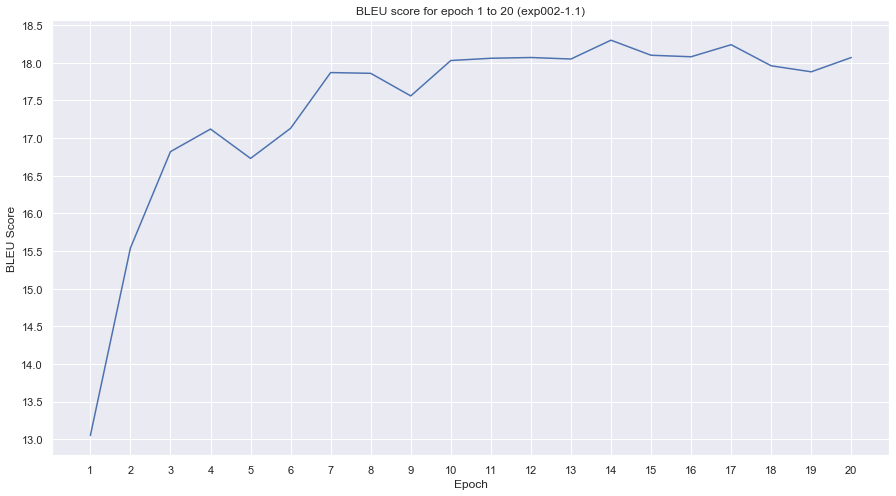

In [6]:
plot_bleu_score_over_n_epoch('exp002-1.1')

## Evaluation result -- exp002-2.1
### Transformer Base (en->th) (sentencepiece->word)

In the experiment setup,

The vocaburary used is ins word-level (from `pythainlp.tokenize.newmm`).

The vocabulary for 

- source language (en) : 23895

- target language (th) : 88847

| Language  |  OOV (%) |
|-----------|----------|
| en-train  | 0.0%   |
| en-valid  | 0.00327%   |
| en-test   | 0.00359%   |
| th-train  | 0.0%     |
| th-valid  | 0.175%   |
| th-test   | 0.176%   |

__Model Hyperparameters__

- architecture: transformer 
- dropout: 0.1
- optimizer: adam with adam-betas = (0.9, 0.98)
- best checkpoint metric: perrplexity
- max epoch: 20
- seed: 1
- learning rate: 5e-4
- learning rate schuduler: inverse_sqrt
- warmup updates: 5000
- max tokens: 3000

```
fairseq-train data/opensubtitles_bin/sentencepiece-newmm/en-th \
    --arch transformer \
		--seed 1 \
	  --dropout 0.1 \
		--max-epoch 30 \
		--best-checkpoint-metric ppl \
		--optimizer adam --adam-betas '(0.9, 0.98)' --clip-norm 25.0 \
		--dropout 0.1 \
		--lr 5e-4 --lr-scheduler inverse_sqrt --warmup-updates 5000 \
		--weight-decay 0.0001 \
		--criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 3000 \
    --save-dir data/opensubtitles_model/exp002-2/transformer_base \
		--tokenizer space \
		--no-progress-bar \
		--log-interval 250 \
    --num-workers 12 \
    --tensorboard-logdir data/opensubtitles_model/exp002-2/transformer_base/tensorboard_log
```



__Model Training__

- average words per batch = 2237.745
- 40 mins/epoch

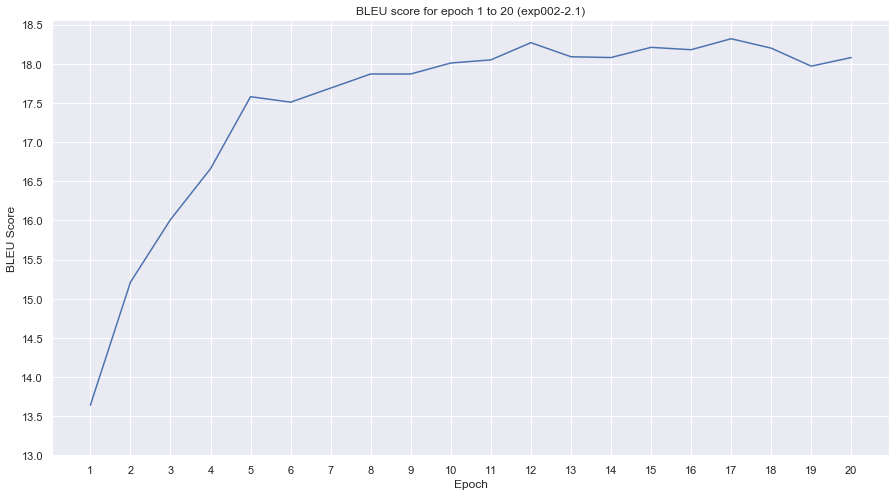

In [7]:
plot_bleu_score_over_n_epoch('exp002-2.1')

__Comparison between exp002-1.1 (word-word) and exp002-2.1 (sentencepice-word)__


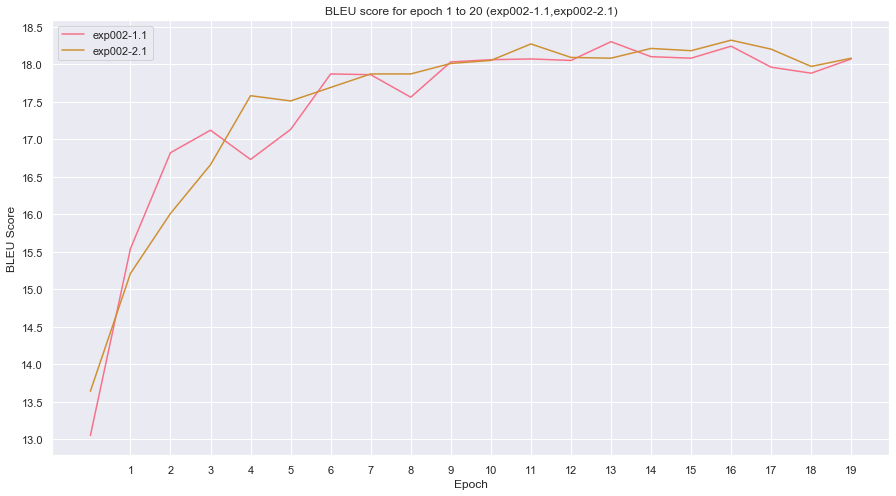

In [8]:
plot_bleu_score_over_n_epoch_compare(['exp002-1.1', 'exp002-2.1'])

## Evaluation result -- exp002-3.1
### Transformer Base (en->th) (word->sentencepiece)

In the experiment setup,

The vocaburary used is ins word-level (from `pythainlp.tokenize.newmm`).

The vocabulary for 

- source language (en) : 89999

- target language (th) : 22143

| Language  |  OOV (%) |
|-----------|----------|
| en-train  | 0.319%   |
| en-valid  | 0.485%   |
| en-test   | 0.488%   |
| th-train  | 0.0%     |
| th-valid  | 0.00359% |
| th-test   | 0.00432% |

__Model Hyperparameters__

- architecture: transformer 
- dropout: 0.1
- optimizer: adam with adam-betas = (0.9, 0.98)
- best checkpoint metric: perplexity
- max epoch: 30
- seed: 1
- learning rate: 5e-4
- learning rate schuduler: inverse_sqrt
- warmup updates: 5000
- max tokens: 3000

```
fairseq-train data/opensubtitles_bin/newmm-sentencepiece/en-th \
		--seed 1 \
		--max-epoch 30 \
		--best-checkpoint-metric ppl \
    --arch transformer \
		--optimizer adam --adam-betas '(0.9, 0.98)' --clip-norm 25.0 \
		--dropout 0.1 \
		--lr 5e-4 --lr-scheduler inverse_sqrt --warmup-updates 5000 \
		--weight-decay 0.0001 \
		--criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 3000 \
    --save-dir data/opensubtitles_model/exp002-3/transformer_base \
		--tokenizer space \
		--no-progress-bar \
		--log-interval 250  \
    --num-workers 12 \
    --tensorboard-logdir data/opensubtitles_model/exp002-3/transformer_base/tensorboard_log

```



__Model Training__

- average words per batch = 2455.787
- 30 mins/epoch

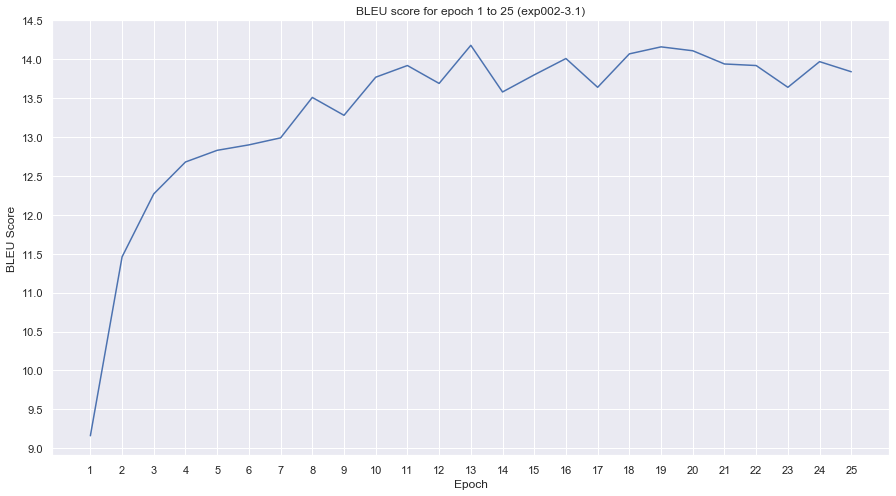

In [9]:
plot_bleu_score_over_n_epoch('exp002-3.1')


## Evaluation result -- exp002-4.1a
### Transformer Base (th->en) (sentencepiece->sentencepiece [shared])


In the experiment setup (a),

The vocaburary used is in subword-level (from SentencePiece pretrained model BPEmb).

The vocabulary is shared between source and target language (total number of vocab size: 42760)

| Language  |  OOV (%) |
|-----------|----------|
| en-train  | 0.0%     |
| en-valid  | 0.00309% |
| en-test   | 0.00353% |
| th-train  | 0.0%     |
| th-valid  | 0.00286% |
| th-test   | 0.00334% |


__Model Hyperparameters__

- architecture: transformer 
- dropout: 0.0 (default of `transformer` = 0.0)
- optimizer: adam with adam-betas = (0.9, 0.98)
- best checkpoint metric: perrplexity
- max epoch: 20
- seed: 1
- learning rate: 5e-4
- learning rate schuduler: inverse_sqrt
- warmup updates: 5000
- max tokens: 4000



__Model Training__

- average words per batch = 3165 (because of increased `max_tokens`)
- 32 minutes per epoch ()

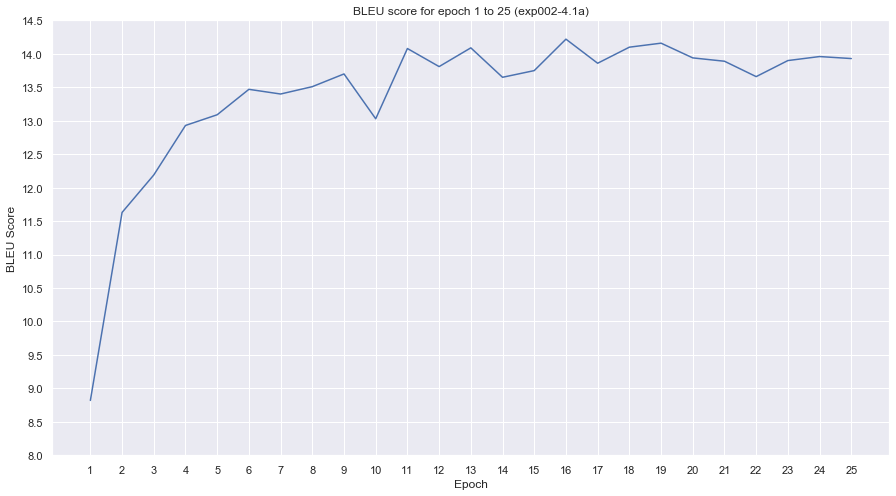

In [10]:
plot_bleu_score_over_n_epoch('exp002-4.1a')


## Evaluation result -- exp002-4.1b
### Transformer Base (th->en) (sentencepiece->sentencepiece [shared])


__Note: I change the `dropout` to 0.1 from 0.0  and `max_tokens` from 4000 to 3000 to make it consistent with the setting of `exp002-1.1`__

In the experiment setup (b)

The vocaburary used is in subword-level (from SentencePiece pretrained model BPEmb).

The vocabulary is shared between source and target language (total number of vocab size: 42760)

| Language  |  OOV (%) |
|-----------|----------|
| en-train  | 0.0%     |
| en-valid  | 0.00309% |
| en-test   | 0.00353% |
| th-train  | 0.0%     |
| th-valid  | 0.00286% |
| th-test   | 0.00334% |


__Model Hyperparameters__

- architecture: transformer 
- dropout: 0.1 **(set to 0.1 to be the same as exp002-1.1)**
- optimizer: adam with adam-betas = (0.9, 0.98)
- best checkpoint metric: perplexity
- max epoch: 20
- seed: 1
- learning rate: 5e-4
- learning rate schuduler: inverse_sqrt
- warmup updates: 5000
- max tokens: 3000 **(change from 4000 to 3000 to make the hyperparams be the same as exp002-1.1)**


__Model Training__

- average words per batch = 2365.037 
- 34 minutes / epoch

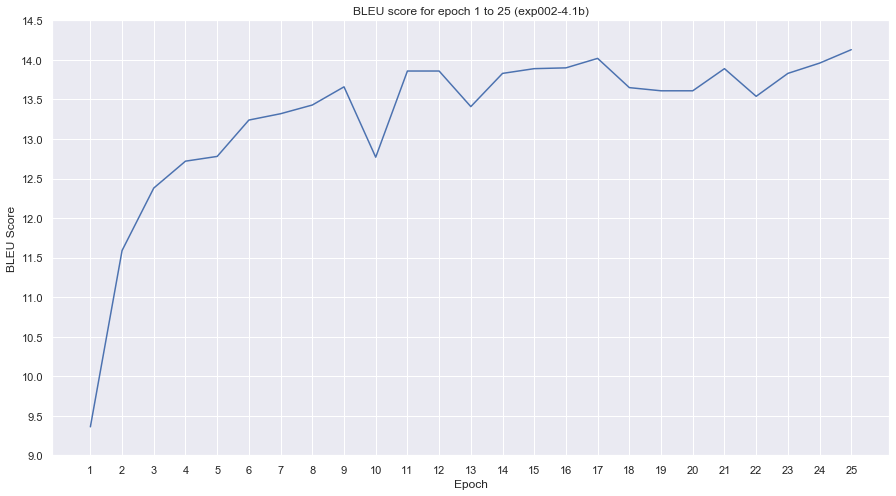

In [11]:
plot_bleu_score_over_n_epoch('exp002-4.1b')

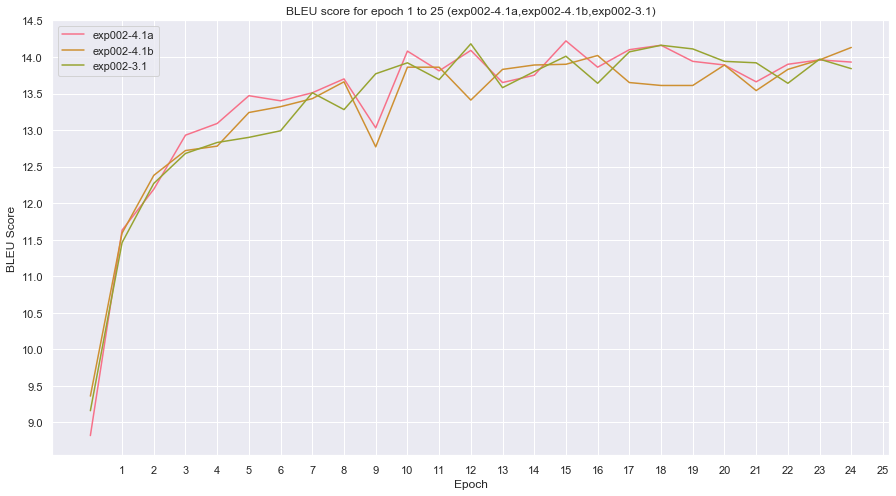

In [12]:
plot_bleu_score_over_n_epoch_compare(['exp002-4.1a', 'exp002-4.1b', 'exp002-3.1'])

# TH -> EN


## Evaluation result -- exp003-1.1 
### Transformer Base (th->en) (word->word)  

In the experiment setup

The vocaburary used is in word-level (from `pythainlp.tokenize.newmm`).

The vocabulary

- source language (th) : 88847

- target language (en) : 99999

| Language  |  OOV (%) |
|-----------|----------|
| th-train  | 0.0%     |
| th-valid  | 0.175%   |
| th-test   | 0.176%   |
| en-train  | 0.269%   |
| en-valid  | 0.452%   |
| en-test   | 0.456%   |


__Model Hyperparameters__

- architecture: transformer 
- dropout: 0.1
- optimizer: adam with adam-betas = (0.9, 0.98)
- best checkpoint metric: perplexity
- max epoch: 20
- seed: 1
- learning rate: 5e-4
- learning rate schuduler: inverse_sqrt
- warmup updates: 5000
- max tokens: 3000

__Model Training__

- average words per batch = 2798.292
- training time = 35.45 minutes/epoch

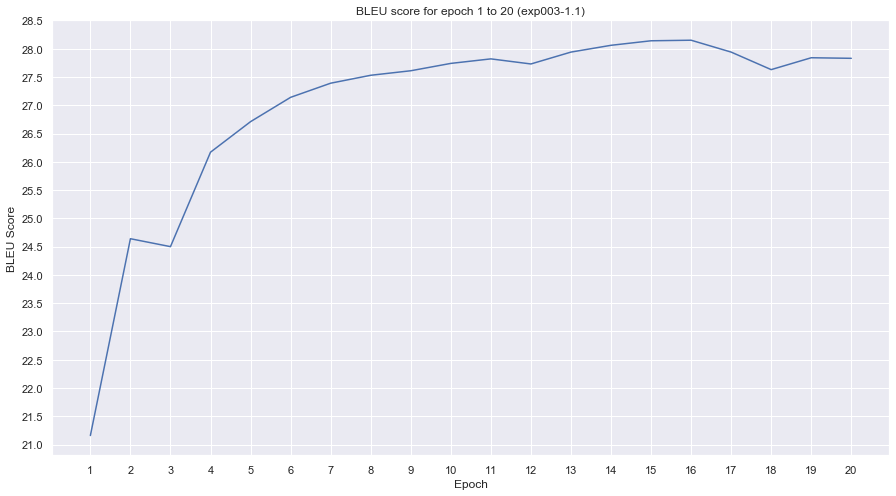

In [13]:
plot_bleu_score_over_n_epoch('exp003-1.1')


## Evaluation result -- exp004-1
### Transformer Base (th->en) (word->word)  

In the experiment setup

The vocaburary used is in word-level (from `pythainlp.tokenize.newmm`).

The vocabulary

- source language (th) : 77,583

- target language (en) : 137,479

| Language  |  OOV (%) |
|-----------|----------|
| th-train  | 0.0%     |
| th-valid  | 0.183%   |
| th-test   | 0.176%   |
| en-train  | 0.0%   |
| en-valid  | 0.28%   |
| en-test   | 0.279%   |

- The data is filtered and cleaned by rules defined in (`notebooks/preprocess_opensubtitle_with_newmm_sentencepiece.ipynb`)


__Model Hyperparameters__

- architecture: transformer 
- dropout: 0.1
- optimizer: adam with adam-betas = (0.9, 0.98)
- best checkpoint metric: perplexity
- max epoch: 20
- seed: 1
- learning rate: 5e-4
- learning rate schuduler: inverse_sqrt
- warmup updates: 3000
- max tokens: 2000

__Model Training__



## Evaluation result -- exp004-1
### Transformer Base (th->en) (word->word)  

In the experiment setup

The vocaburary used is in word-level (from `pythainlp.tokenize.newmm`).

The vocabulary

- source language (th) : 77,583

- target language (en) : 137,479

| Language  |  OOV (%) |
|-----------|----------|
| th-train  | 0.0%     |
| th-valid  | 0.183%   |
| th-test   | 0.176%   |
| en-train  | 0.0%   |
| en-valid  | 0.28%   |
| en-test   | 0.279%   |

- The data is filtered and cleaned by rules defined in (`notebooks/preprocess_opensubtitle_with_newmm_sentencepiece.ipynb`)


__Model Hyperparameters__

- architecture: transformer 
- dropout: 0.1
- optimizer: adam with adam-betas = (0.9, 0.98)
- best checkpoint metric: perplexity
- max epoch: 20
- seed: 1
- learning rate: 5e-4
- learning rate schuduler: inverse_sqrt
- warmup updates: 3000
- max tokens: 2000

__Model Training__

- Words per batch: ~1,865
- Words per sec: 6,588
- Updates per sec:  3 

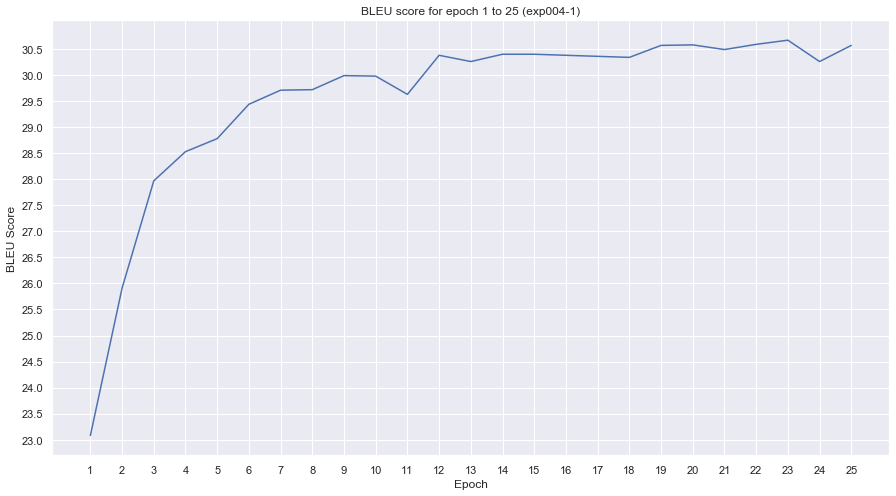

In [15]:
plot_bleu_score_over_n_epoch('exp004-1')


## Evaluation result -- exp004-1.1 (Larger batch size)
### Transformer Base (th->en) (word->word)  

In the experiment setup

The vocaburary used is in word-level (from `pythainlp.tokenize.newmm`).

The vocabulary

- source language (th) : 77,583

- target language (en) : 137,479

| Language  |  OOV (%) |
|-----------|----------|
| th-train  | 0.0%     |
| th-valid  | 0.183%   |
| th-test   | 0.176%   |
| en-train  | 0.0%   |
| en-valid  | 0.28%   |
| en-test   | 0.279%   |

- The data is filtered and cleaned by rules defined in (`notebooks/preprocess_opensubtitle_with_newmm_sentencepiece.ipynb`)


__Model Hyperparameters__

- architecture: transformer 
- dropout: 0.1
- optimizer: adam with adam-betas = (0.9, 0.98)
- best checkpoint metric: perplexity
- max epoch: 20
- seed: 1
- learning rate: 5e-4
- learning rate schuduler: inverse_sqrt
- warmup updates: 3000
- max tokens: 2000
- update_freq: 8 (This make Transformer trains in a larger mini-batch)

__Model Training__

- Words per batch: 14,932
- Words per sec: 8,009
- Updates per sec: 1

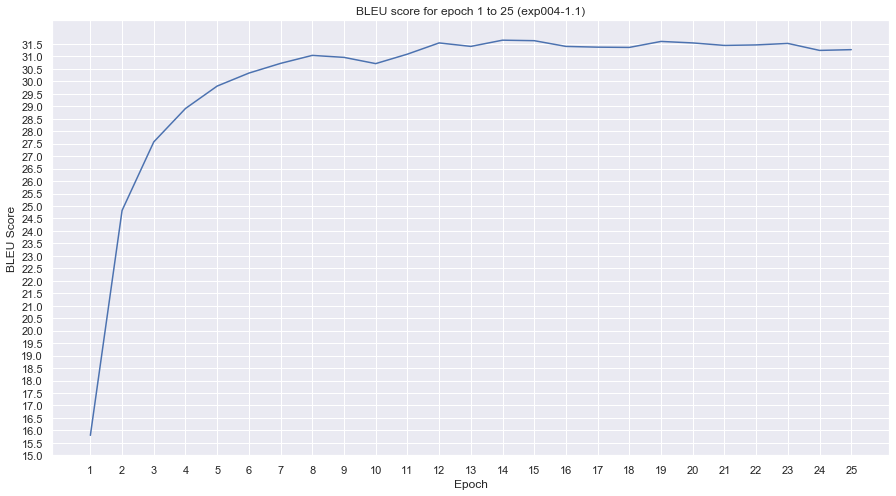

In [16]:
plot_bleu_score_over_n_epoch('exp004-1.1')

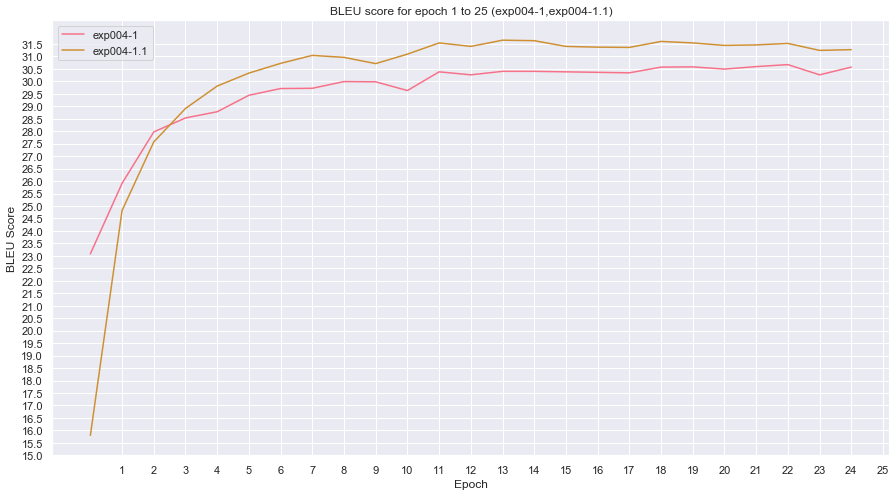

In [17]:
plot_bleu_score_over_n_epoch_compare(['exp004-1', 'exp004-1.1'])

In [18]:
%tensorboard --logdit ./tensorboard_log/exp004-1.1

UsageError: Line magic function `%tensorboard` not found.
